In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import sqrt
from sklearn.metrics import mean_squared_error
from warnings import filterwarnings

# df = pd.read_csv(r"D:\March 2024\PML\Day 14\AirPassengers.csv")
# df

# df = pd.read_csv(r"D:\March 2024\PML\Day 14\FMAC-HPI_24420.csv")
# df

df = pd.read_csv(r"D:\March 2024\PML\Day 14\sales-of-shampoo-over-a-three-ye.csv")
df

,Month,Sales of shampoo over a three year period
0,2001-01-01,266.0
1,2001-02-01,145.9
2,2001-03-01,183.1
3,2001-04-01,119.3
4,2001-05-01,180.3
5,2001-06-01,168.5
6,2001-07-01,231.8
7,2001-08-01,224.5
8,2001-09-01,192.8
9,2001-10-01,122.9


In [56]:
#Changing the time-series to Quarterly
#Shampoo by Sir

# df = pd.read_csv(r"D:\March 2024\PML\Day 14\AirPassengers.csv",index_col=0)

# df = pd.read_csv(r"D:\March 2024\PML\Day 14\FMAC-HPI_24420.csv",index_col=0)

df = pd.read_csv(r"D:\March 2024\PML\Day 14\sales-of-shampoo-over-a-three-ye.csv",index_col=0)

df.index =  pd.to_datetime(df.index).to_period("M")

print(df)

         Sales of shampoo over a three year period
Month                                             
2001-01                                      266.0
2001-02                                      145.9
2001-03                                      183.1
2001-04                                      119.3
2001-05                                      180.3
2001-06                                      168.5
2001-07                                      231.8
2001-08                                      224.5
2001-09                                      192.8
2001-10                                      122.9
2001-11                                      336.5
2001-12                                      185.9
2002-01                                      194.3
2002-02                                      149.5
2002-03                                      210.1
2002-04                                      273.3
2002-05                                      191.4
2002-06                        

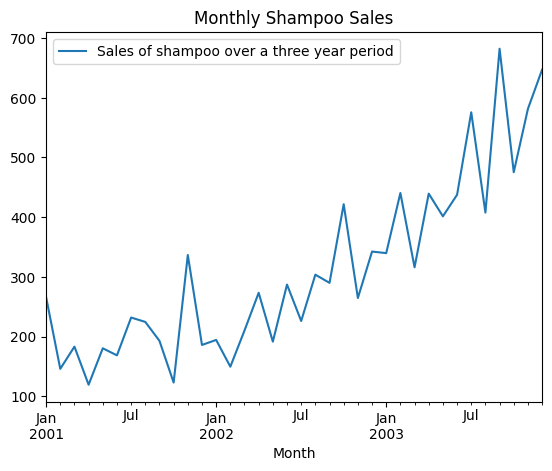

In [57]:
df.plot()
# plt.title("Monthly Passengers")
# plt.title("Monthly FMAC-HPI Sales")
plt.title("Monthly Shampoo Sales")
plt.show()

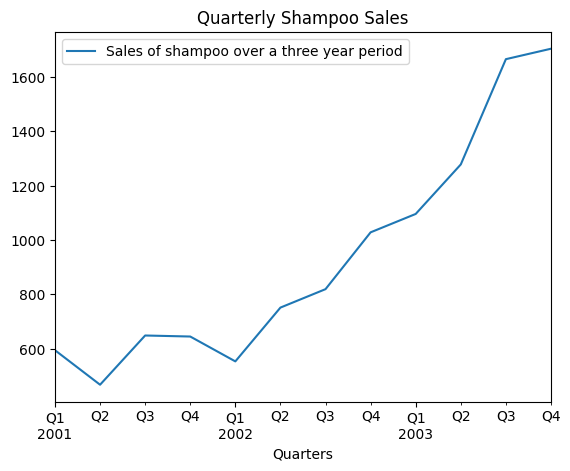

In [58]:
df_qtr = df.resample('Q').sum()
df_qtr.index.rename('Quarter', inplace=True)
df_qtr.plot()

# plt.title("Quarterly Passengers")
# plt.title("Quarterly FMAC-HPI Sales")
plt.title("Quarterly Shampoo Sales")
plt.xlabel("Quarters")
plt.show()

rms:  165.1111746672526


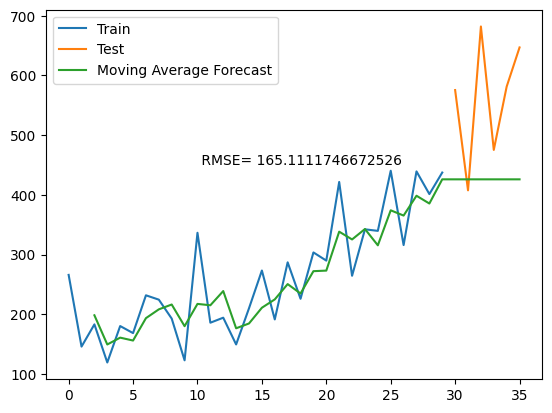

In [4]:
############## Trailing Rolling Mean #############################################
# y_train = df['NSA Value'][:-12]
# y_test = df['NSA Value'][-12:]
# y_train = df['SA Value'][:-200]
# y_test = df['SA Value'][-200:]

# y_train = df['GDP per capita'][:-12]
# y_test = df['GDP per capita'][-12:]


y_train = df['Sales of shampoo over a three year period'][:-6]
y_test = df['Sales of shampoo over a three year period'][-6:]

span=3
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_series],ignore_index=True)

error =sqrt(mean_squared_error(y_test,MA_series))
print("rms: ",error)

plt.plot(y_train,label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast,label='Moving Average Forecast')

plt.text(10,450, " RMSE= "+str(error))
plt.legend(loc='best')
plt.show()


{'smoothing_level': 0.1, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 266.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
251.9501655217565


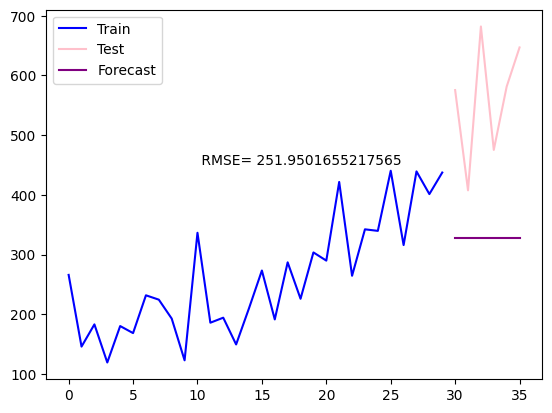

In [6]:
################################## Simple Exponential Smoothing ######################################################
filterwarnings('ignore')

alpha = 0.1
from statsmodels.tsa.api import SimpleExpSmoothing
ses = SimpleExpSmoothing(y_train)
fit1 = ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))
print(fit1.params)
error=sqrt(mean_squared_error(y_test,fcast1))
print(error)  

#plot
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast') 

plt.text(10,450, " RMSE= "+str(error))
plt.legend(loc='best')
plt.show()

578.3676363233054


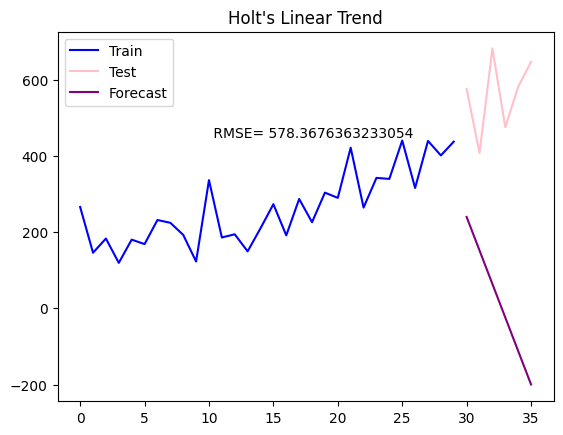

In [15]:
#Holt Winter

alpha = 0.5
beta = 0.01

from statsmodels.tsa.api import Holt
holt = Holt(y_train)
fit1 = holt.fit(smoothing_level = alpha, smoothing_trend=beta)

fcast1 = fit1.forecast(len(y_test))

rms=sqrt(mean_squared_error(y_test, fcast1))
print(rms)

#plot
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.text(10,450, " RMSE= "+str(rms))
plt.title("Holt's Linear Trend")
plt.legend(loc='best')
plt.show()



336.2629083672954


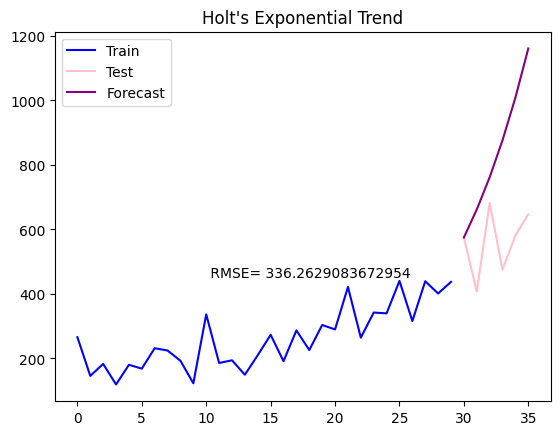

336.2629083672954


In [16]:
#Holt Exponential

alpha = 0.1
beta = 1

from statsmodels.tsa.api import Holt
holt = Holt(y_train, exponential=True)
fit1 = holt.fit(smoothing_level = alpha, smoothing_trend=beta)

fcast1 = fit1.forecast(len(y_test))

#plot
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')

rms=sqrt(mean_squared_error(y_test, fcast1))
print(rms)

plt.title("Holt's Exponential Trend")
plt.text(10,450, " RMSE= "+str(rms))
plt.legend(loc='best')
plt.show()

rms=sqrt(mean_squared_error(y_test, fcast1))
print(rms)

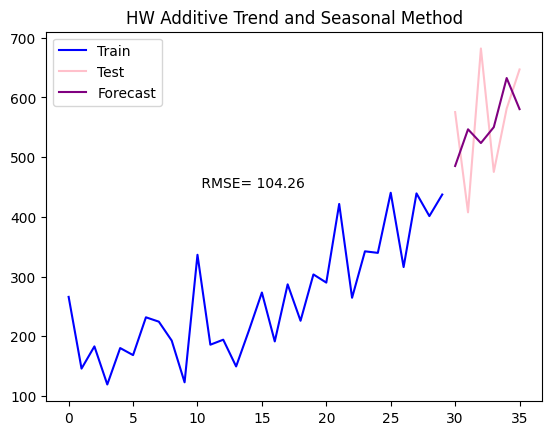

In [7]:
# Damped Trend Methods

# Additive

from statsmodels.tsa.api import ExponentialSmoothing

alpha, beta, gamma = 0.25, 0.25, 0.01 #0.8, 0.02, 0.1
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='add', use_boxcox = 0.5)
fit1 = hw_add.fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal=gamma) #without tuning RMSE = 11.92 #smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal=gamma
fcast1 = fit1.forecast(len(y_test))

#plot
y_train.plot(color = "blue", label = "Train")
y_test.plot(color = "pink", label = 'Test')
fcast1.plot(color = "purple", label ="Forecast")

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)

plt.text(10,450, " RMSE= "+str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend()
plt.show()

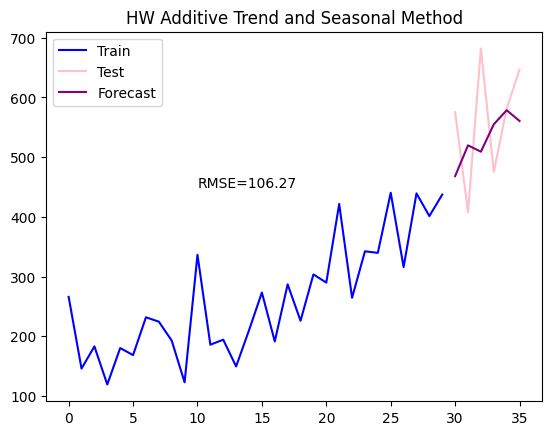

In [8]:
# Additive damped

from statsmodels.tsa.api import ExponentialSmoothing

alpha, beta, gamma, phi = 0.1, 0.95, 0.3, 0.1 #0.8, 0.02, 0.1 sir's
hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='add') 
fit1 = hw_add.fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal=gamma, damping_trend = phi)
fcast1 = fit1.forecast(len(y_test))

#plot
y_train.plot(color = "blue", label = "Train")
y_test.plot(color = "pink", label = 'Test')
fcast1.plot(color = "purple", label ="Forecast")

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)

plt.text(10,450, " RMSE= "+str(error))
plt.title("HW Additive Trend and Seasonal Method")
plt.legend()
plt.show()

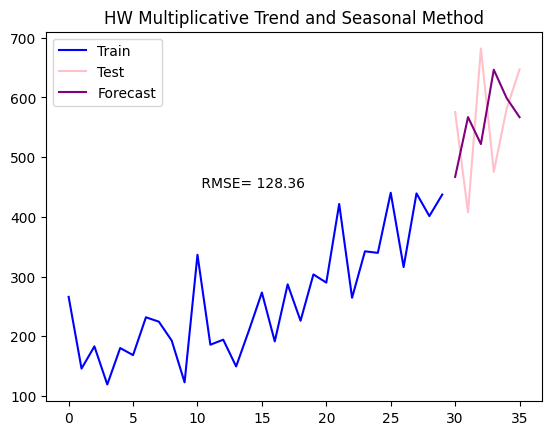

In [9]:

# Multiplicative 

from statsmodels.tsa.api import ExponentialSmoothing

alpha, beta, gamma = 0.15, 0.55, 0.55 #0.8, 0.02, 0.1 #sirs
hw_mul = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='mul') 
fit1 = hw_mul.fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal=gamma) 
fcast1 = fit1.forecast(len(y_test))

#plot
y_train.plot(color = "blue", label = "Train")
y_test.plot(color = "pink", label = 'Test')
fcast1.plot(color = "purple", label ="Forecast")

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)

plt.text(10,450, " RMSE= "+str(error))
plt.title("HW Multiplicative Trend and Seasonal Method")
plt.legend()
plt.show()

129.69


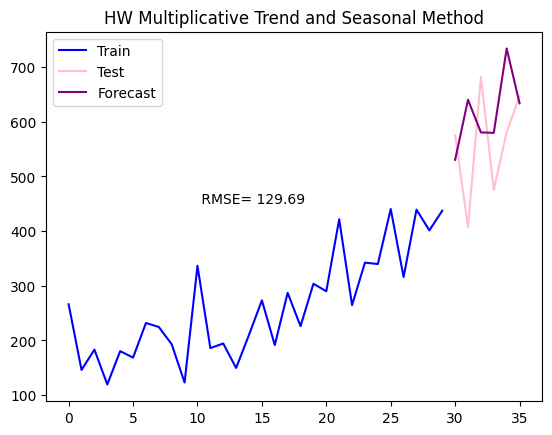

In [59]:
# Multiplicative and Damping

from statsmodels.tsa.api import ExponentialSmoothing

alpha, beta, gamma, phi = 0.1, 0.95, 0.3, 0.1 #0.8, 0.02, 0.1 #sirs
hw_mul = ExponentialSmoothing(y_train, seasonal_periods=12, trend = 'add', seasonal='mul', use_boxcox=0.01) 
fit1 = hw_mul.fit(smoothing_level = alpha, smoothing_trend = beta, smoothing_seasonal=gamma, damping_trend = phi) 
fcast1 = fit1.forecast(len(y_test))

#plot
y_train.plot(color = "blue", label = "Train")
y_test.plot(color = "pink", label = 'Test')
fcast1.plot(color = "purple", label ="Forecast")

error = round(sqrt(mean_squared_error(y_test, fcast1)),2)
print(error)

plt.text(10,450, " RMSE= "+str(error))
plt.title("HW Multiplicative Trend and Seasonal Method")
plt.legend()
plt.show()